In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd drive

/content/drive


In [ ]:
cd My Drive

/content/drive/My Drive


In [ ]:
dataframe=pd.read_csv('OWM.csv')

In [ ]:
dataframe.head()  #4june2020 
#data set is collected from 26june2020 to 4 july2020 by calling open weather api 

,clouds,dew_point,dt,feels_like,humidity,pressure,rain,temp,weather,wind_deg,wind_speed(m/s),mean_WindSpeed(m/s),mean_wind_deg,time
0,11,292.12,1594123200,303.17,46,1006,NaN,305.19,"[{'id': 801, 'main': 'Clouds', 'description': ...",273,7.47,7.5,270,01/19/1970 10:48:43
1,53,292.56,1594126800,302.60,50,1006,NaN,304.20,"[{'id': 803, 'main': 'Clouds', 'description': ...",273,7.16,7.0,270,01/19/1970 10:48:46
2,80,293.21,1594130400,302.39,57,1008,NaN,302.62,"[{'id': 803, 'main': 'Clouds', 'description': ...",274,5.63,5.5,270,01/19/1970 10:48:50
3,74,293.43,1594134000,301.36,62,1008,NaN,301.40,"[{'id': 803, 'main': 'Clouds', 'description': ...",281,5.51,5.5,270,01/19/1970 10:48:54
4,70,293.65,1594137600,301.26,65,1008,NaN,300.82,"[{'id': 803, 'main': 'Clouds', 'description': ...",283,4.98,5.0,270,01/19/1970 10:48:57


In [ ]:
data= dataframe

In [ ]:
data.head()

,Unnamed: 0,clouds,dew_point,dt,feels_like,humidity,pressure,rain,temp,weather,wind_deg,wind_speed(m/s),mean_WindSpeed(m/s),mean_wind_deg,time,id,main,description,icon
0,0,11,292.12,1594123200,303.17,46,1006,NaN,305.19,"[{'id': 801, 'main': 'Clouds', 'description': ...",273,7.47,7.5,270,01/19/1970 10:48:43,801,Clouds,few clouds,02d
1,1,53,292.56,1594126800,302.60,50,1006,NaN,304.20,"[{'id': 803, 'main': 'Clouds', 'description': ...",273,7.16,7.0,270,01/19/1970 10:48:46,803,Clouds,broken clouds,04d
2,2,80,293.21,1594130400,302.39,57,1008,NaN,302.62,"[{'id': 803, 'main': 'Clouds', 'description': ...",274,5.63,5.5,270,01/19/1970 10:48:50,803,Clouds,broken clouds,04n
3,3,74,293.43,1594134000,301.36,62,1008,NaN,301.40,"[{'id': 803, 'main': 'Clouds', 'description': ...",281,5.51,5.5,270,01/19/1970 10:48:54,803,Clouds,broken clouds,04n
4,4,70,293.65,1594137600,301.26,65,1008,NaN,300.82,"[{'id': 803, 'main': 'Clouds', 'description': ...",283,4.98,5.0,270,01/19/1970 10:48:57,803,Clouds,broken clouds,04n


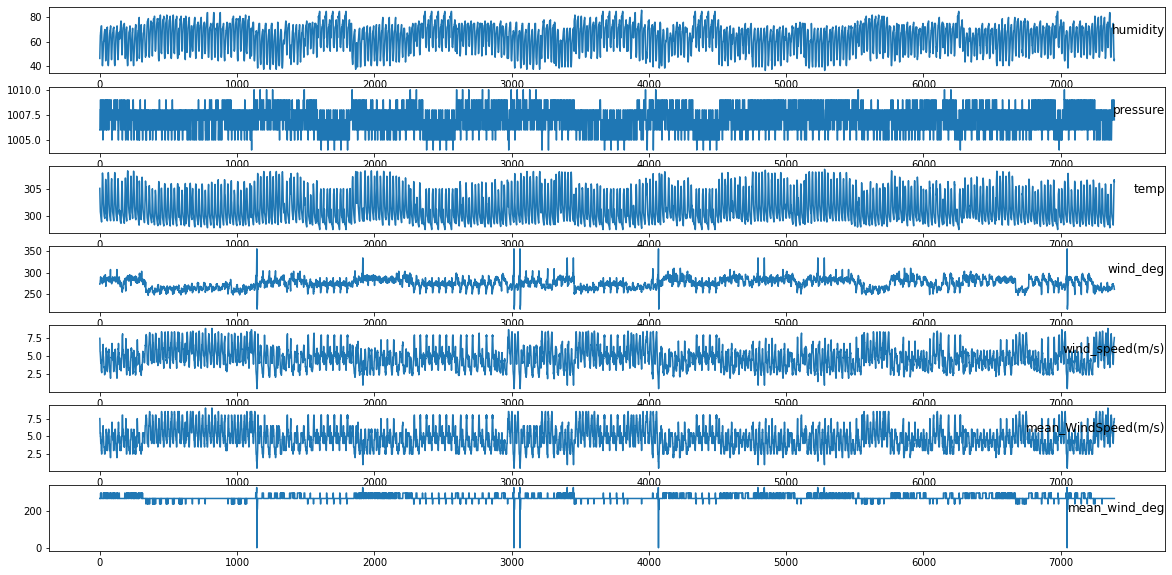

In [ ]:
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
req_dataset=data[['humidity','pressure','temp','wind_deg','wind_speed(m/s)','mean_WindSpeed(m/s)','mean_wind_deg']]
values = req_dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4,5,6]
i = 1
# plot each column
#plt.figure()
plt.figure(figsize=(20,10))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(req_dataset.columns[group], y=0.5, loc='right')
    i += 1

plt.show()

In [ ]:
#target_names = ['humidity','pressure','temp','wind_deg','wind_speed(m/s)','mean_WindSpeed(m/s)','mean_wind_deg']
target_names=['wind_deg']

In [ ]:
len(data)/48

154.0

In [ ]:
shift_hours = 1
shift_steps = shift_hours * 2*48

In [ ]:
df_targets = data[target_names]

In [ ]:
df_targets

,wind_deg
0,273
1,273
2,274
3,281
4,283
...,...
7387,269
7388,268
7389,265
7390,264


In [ ]:
#x_data=df_targets.values[0:-shift_steps]

In [ ]:
#x_data.shape

In [ ]:
#y_data = df_targets.values[:-shift_steps]

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_targets = scaler.fit_transform(df_targets)
# split into train and test sets
train_size = int(len(df_targets) * 0.67)
test_size = len(df_targets) - train_size
train, test = df_targets[0:train_size,:], df_targets[train_size:len(df_targets),:]


In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(4950, 1, 1)

In [ ]:
x=trainX[0:1,:,0]

In [ ]:
x[0,0]

0.41428571428571437

In [ ]:
testX.shape

(2438, 1, 1)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

In [ ]:
model.save_weights("IBM_hack_wind_deg.h5")

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.load_weights("IBM_hack_wind_deg.h5")


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
testX.shape

(2438, 1, 1)

In [ ]:
testX.shape

(2438, 1, 1)

In [ ]:
testPredict.shape


(2438, 1)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)

In [ ]:
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.33 RMSE
Test Score: 4.97 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_targets)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
testPredictPlot = np.empty_like(df_targets)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df_targets)-1, :] = testPredict

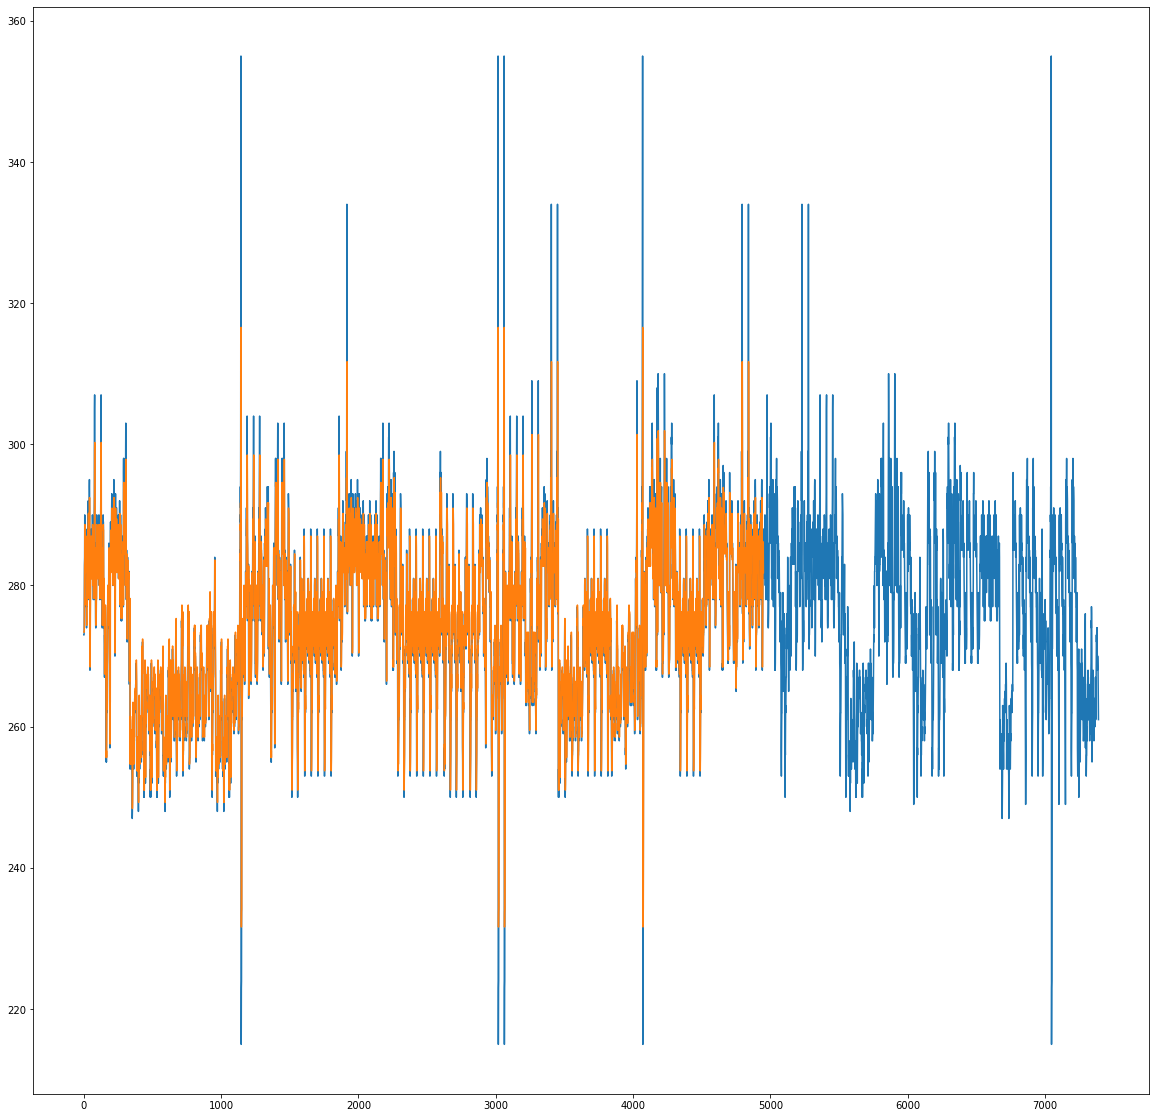

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(scaler.inverse_transform(df_targets))
plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
plt.show()

In [ ]:
#for deploying model in android or flutter apps , convert the model to tflite model
import tensorflow as tf
#model = tf.keras.models.load_model('content/drive/My Drive/IBM_hack_wind_speed.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("IBM_hack_wind_deg.tflite", "wb").write(tflite_model)


12068